Website Performance Analysis

Questions :

1) What patterns or trends can you observe in website sessions and users over time?

2) Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?

3) Which channel has the highest average engagement time, and what does that, tell us about user behavior and content effectiveness?

4) How does engagement rate vary across different traffic channels?

5) Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels?

6) At what hours of the day does each channel drive the most traffic?

7) Is there any correlation between high traffic (sessions) and high engagement rate over time?

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/website data.csv')
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   # ----------------------------------------  3183 non-null   object
 1   Unnamed: 1                                  3183 non-null   object
 2   Unnamed: 2                                  3183 non-null   object
 3   Unnamed: 3                                  3183 non-null   object
 4   Unnamed: 4                                  3183 non-null   object
 5   Unnamed: 5                                  3183 non-null   object
 6   Unnamed: 6                                  3183 non-null   object
 7   Unnamed: 7                                  3183 non-null   object
 8   Unnamed: 8                                  3183 non-null   object
 9   Unnamed: 9                                  3183 non-null   object
dtypes: object(10)
memory usa

In [15]:
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)
df.columns = ["Channel group", "DateHour", "Users", "Sessions", "Engaged Sessions", "Average engagement time per session", "Engaged sessions per user", "Events per session", "Engagement rate", "Event count"]
df.head()

,Channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [16]:
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors="coerce")
numeric_cols = df.columns.drop(["Channel group", "DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")
df["Hour"] = df["DateHour"].dt.hour
df.head()

,Channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged Sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [18]:
df.describe()

,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


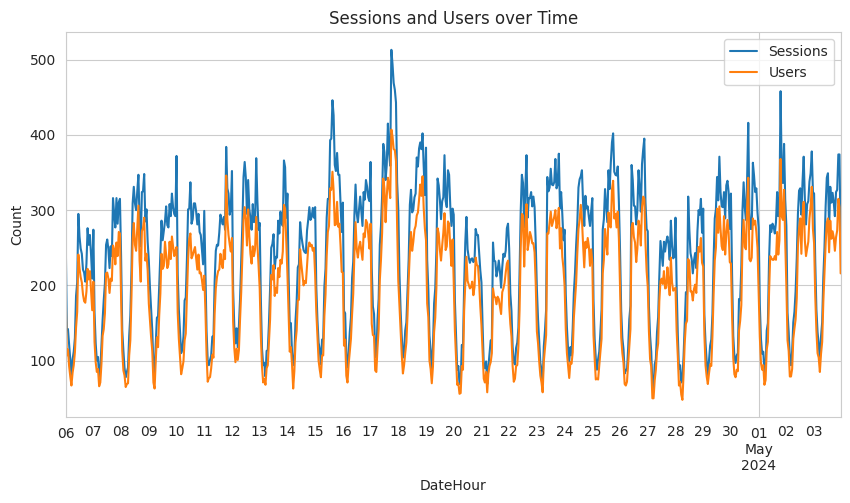

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and Users over Time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.show()

From above we can conclude, for DateHour between 15 to 20 of month we can observe maximum user and session engagement by users on the wesbite.

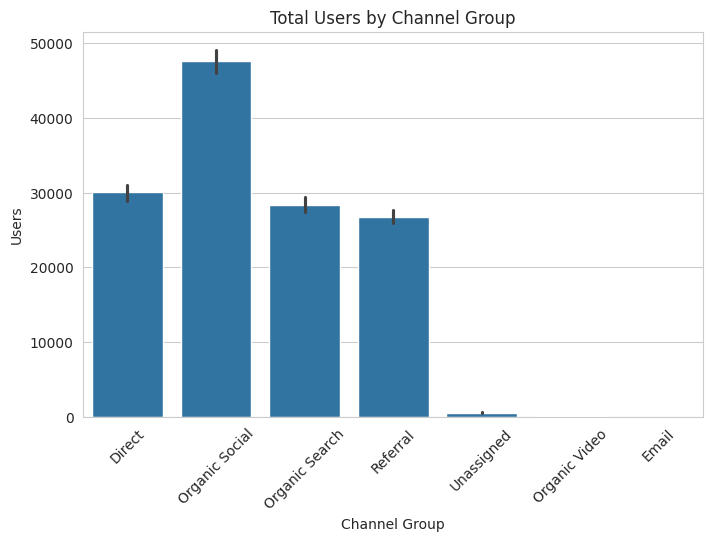

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Channel group", y="Users", estimator=np.sum)
plt.title("Total Users by Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Users")
plt.xticks(rotation=45)
plt.show()

From above we can conclude, Organic Social marketing channel brought the highest number of users to the website, also Unassigned, Organic video and Email are least performing channels and need to be work upon it to bring more user engagement on the website.

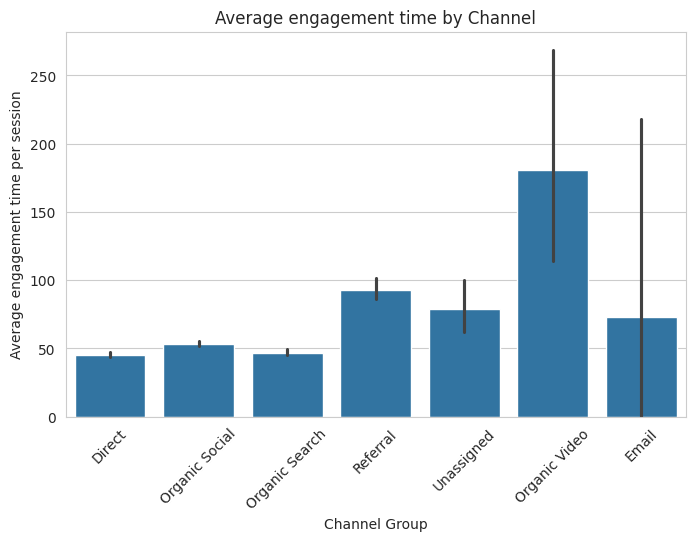

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Channel group", y="Average engagement time per session", estimator=np.mean)
plt.title("Average engagement time by Channel")
plt.xlabel("Channel Group")
plt.ylabel("Average engagement time per session")
plt.xticks(rotation=45)
plt.show()

From above we conclude, Oragnic Video channel has the highest average engagement time and though Organic Video and Email channel brought leasat users but user throught this channel show highest average engagement time, thus working on this channel could benefit to increase more users and engagement on website along with Organic Social and Referral channels.

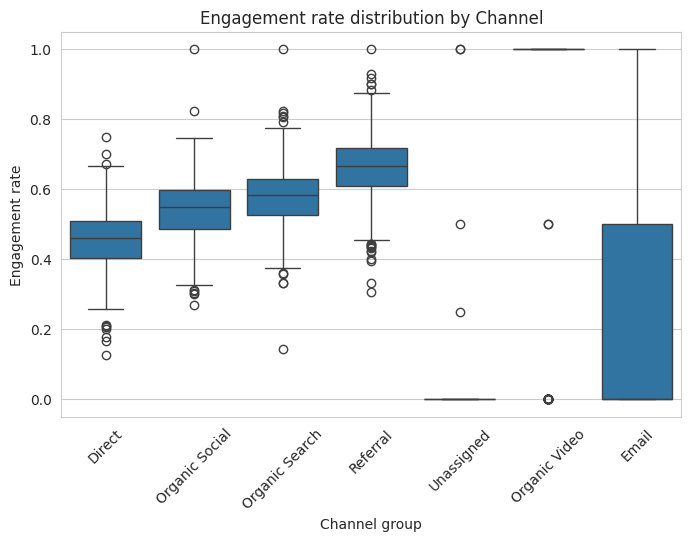

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Channel group", y="Engagement rate")
plt.title("Engagement rate distribution by Channel")
plt.xticks(rotation=45)
plt.show()

Engagement rate vary across different traffic channels as follows,

Referral shows most consistent and high engagement

Organic Search has stable engagement and few outliers

Organic Social shows more variation but has decent performance

Thus, we can conclude Referral channel is best performer while Oragnic Search is stable and consistent

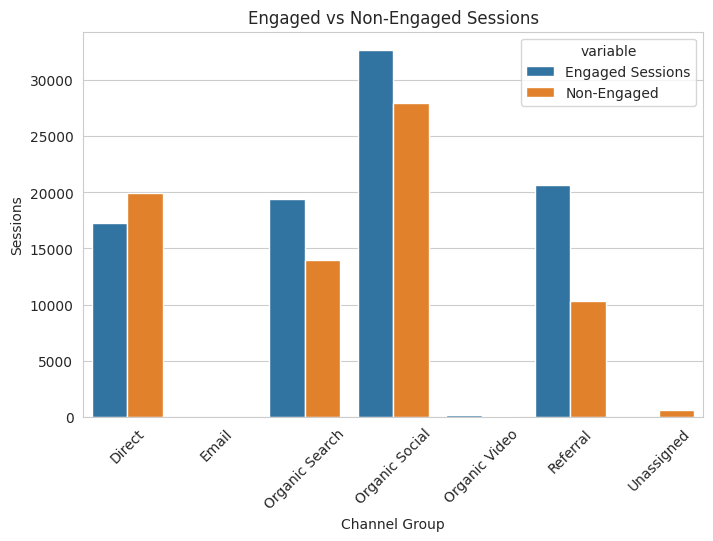

In [32]:
session_df = df.groupby("Channel group")[["Sessions", "Engaged Sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged Sessions"]
session_df_melted = session_df.melt(id_vars="Channel group", value_vars=["Engaged Sessions", "Non-Engaged"])

plt.figure(figsize=(8,5))
sns.barplot(data=session_df_melted, x="Channel group", y="value", hue="variable")
plt.title("Engaged vs Non-Engaged Sessions")
plt.xlabel("Channel Group")
plt.ylabel("Sessions")
plt.xticks(rotation=45)
plt.show()

Organic Social, Referral channels are driving more engaged sessions compared to Email, Organic Video, Unassigned non-engaged ones, also Organic Social along with engagment has highest non-engaged use interaction. Direct channels non-engaged count is high then its engaged which is conern and need attention to improve it.

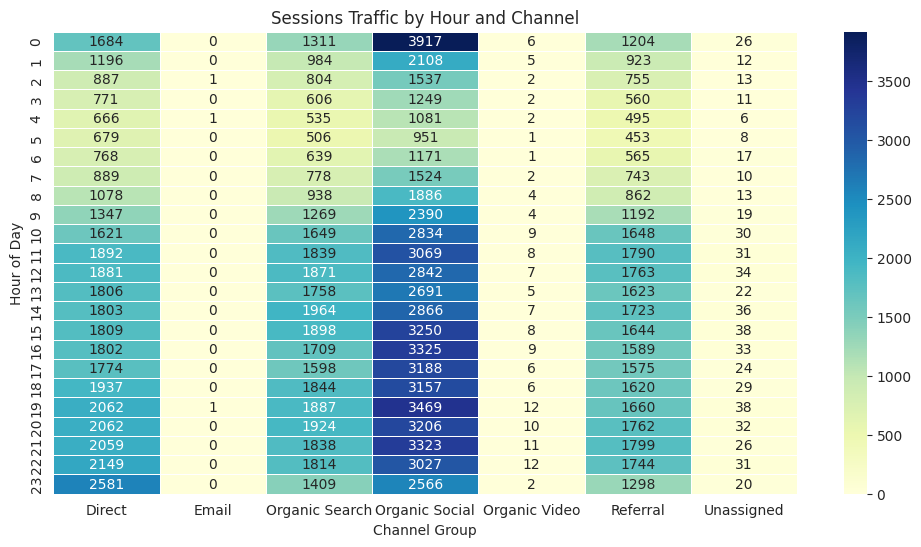

In [36]:
heatmap_data = df.groupby(["Hour", "Channel group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Sessions Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

From above we can conclude, Organic Social Channel has highest traffic for time 00:00 where traffic count has reached highest 3917 among all other channels.

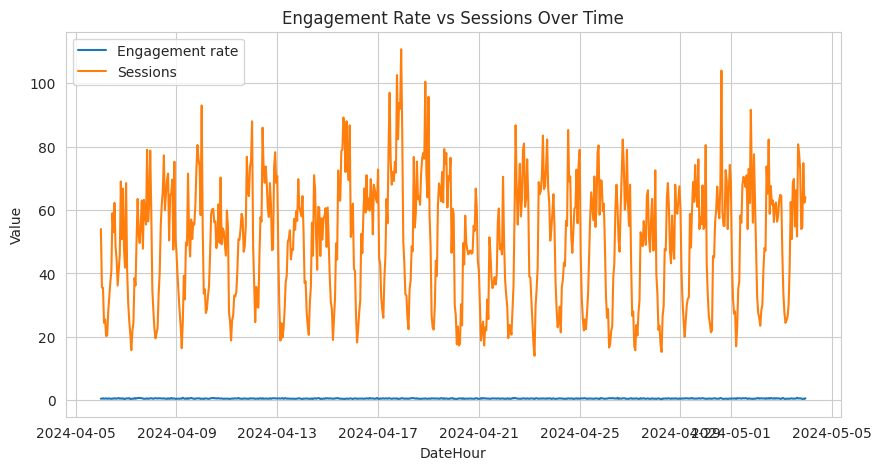

In [39]:
df_plot = df.groupby("DateHour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_plot["DateHour"], df_plot["Engagement rate"], label="Engagement rate")
plt.plot(df_plot["DateHour"], df_plot["Sessions"], label="Sessions")
plt.title("Engagement Rate vs Sessions Over Time")
plt.xlabel("DateHour")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

From above we can conlcude sessions are high but engagment is low over time

Overall Conclusion

The website shows strong traffic through Organic Social and Referral channels, with potential in Organic Video and Email based on user engagement time. However, there's a notable disconnect between high traffic and consistent engagement, indicating room for optimization in content delivery, timing, and user journey design.

Recommendations for Improvement

Boost Underperforming Channels:

Email Campaigns: Personalize content, improve subject lines, and test different time slots.

Organic Video: Invest in SEO-optimized, value-driven videos to increase reach.

Unassigned traffic: Analyze and classify this to identify hidden sources or fix tagging issues.

Leverage High-Engagement Channels:

Scale Referral partnerships and Organic Social strategies, as they bring quality traffic.

Schedule more posts or campaigns during mid-month and at midnight, based on peak traffic insights.

Improve User Engagement:

For channels with high non-engaged sessions (e.g., Direct, Email), optimize landing pages and CTAs.

A/B test landing content to reduce bounce rate and increase interaction.

Align Content with User Behavior:

Study content types popular during the 15-20th timeframe to replicate success.

Focus on producing deeper, more engaging content for high-engagement time windows.